#Stroke Prediction Model (2nd dataset)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Library Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

##Dataset Import

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dissertation/health_data.csv")

In [ ]:
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


#Data Preparation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

In [ ]:
data.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Find missing data within the dataset. Result: No missing values found.
data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

#Data Visualisation

##Correlation Heatmap

In [ ]:
data.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.278738,0.338132,0.123879
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.044413,0.040819,0.003822
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.289213,0.316515,0.099786
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.115382,0.103283,0.022529
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.293373,0.241019,0.022931
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.085999,0.087438,0.064658
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.211523,0.210750,0.223394
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.158666,-0.136102,-0.079985
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.054077,-0.040852,-0.008996
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.079293,-0.066624,-0.047601


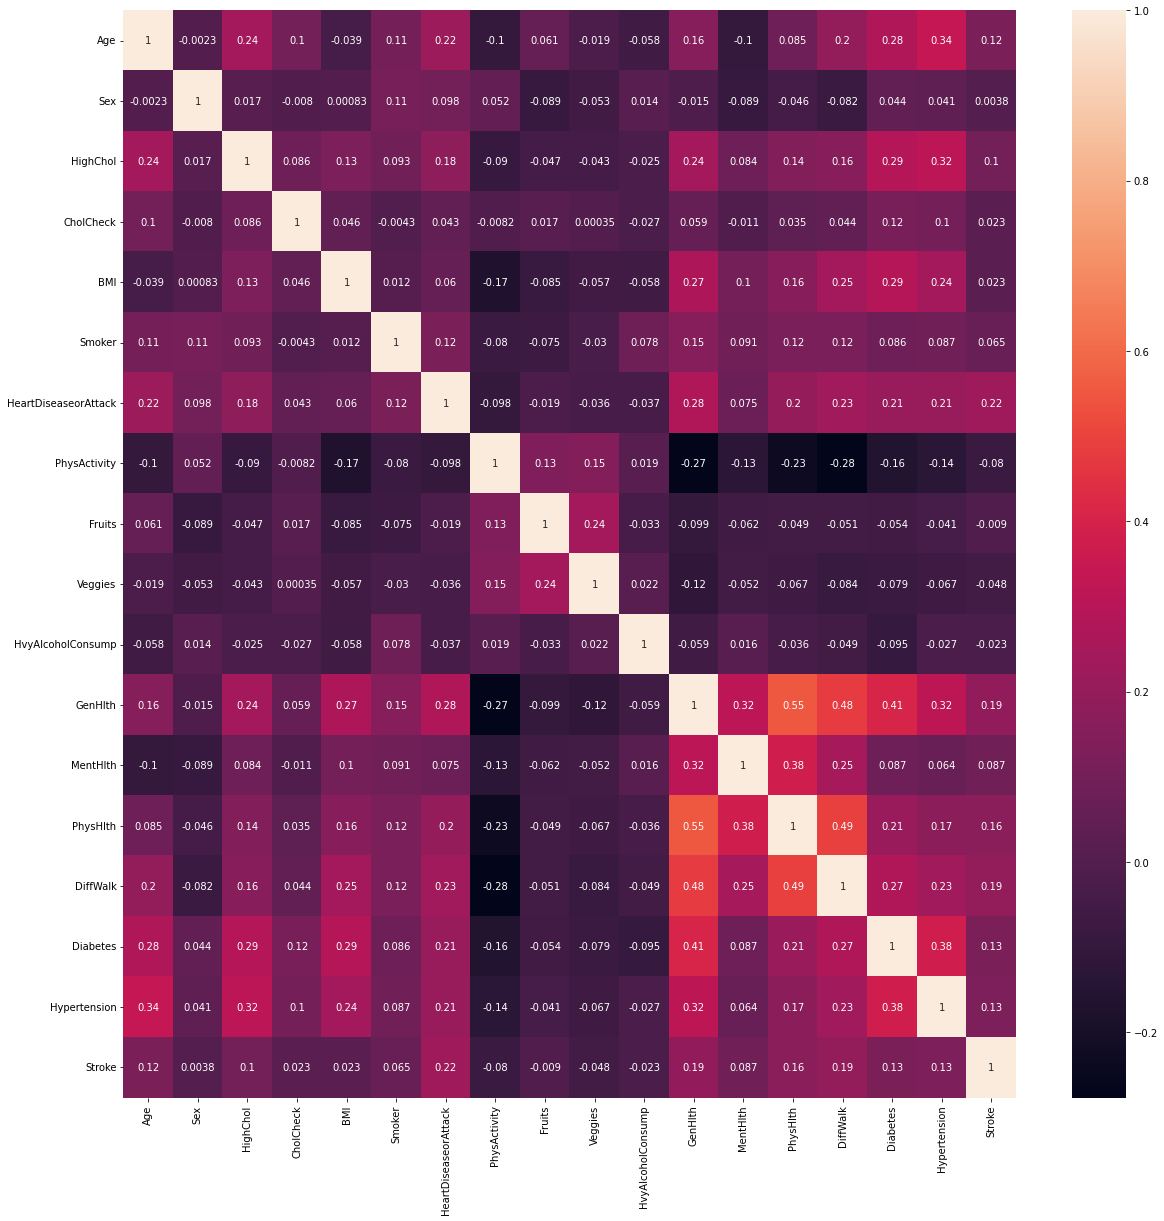

In [ ]:
corr = data.corr()
top_features = corr.index
plt.figure(figsize = (20,20))
sns.heatmap(data[top_features].corr(), annot = True)

##Count Plot

In [ ]:
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
print(data['Hypertension'].value_counts())

1.0    39832
0.0    30860
Name: Hypertension, dtype: int64


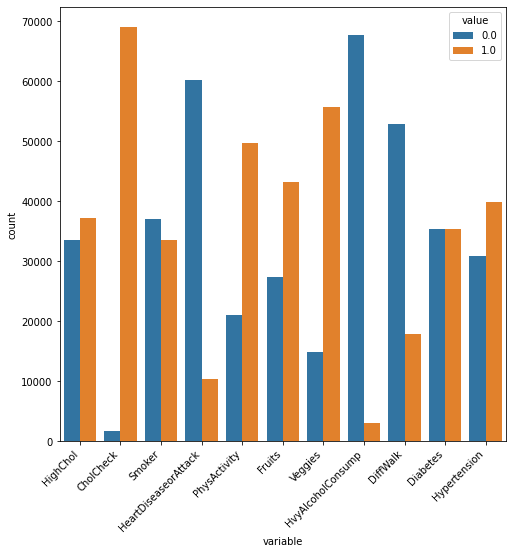

In [ ]:
fig = plt.figure(figsize = (8,8))
df_categorical = data.loc[:,['HighChol','CholCheck','Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'DiffWalk','Diabetes','Hypertension']]
chart = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.show()

3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: GenHlth, dtype: int64


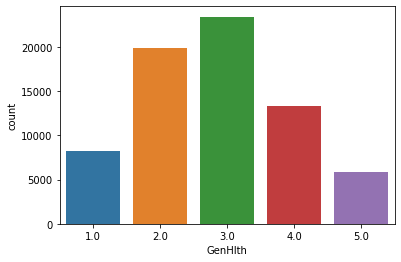

In [ ]:
sns.countplot(data = data, x = "GenHlth")
print(data['GenHlth'].value_counts())

0.0    66297
1.0     4395
Name: Stroke, dtype: int64


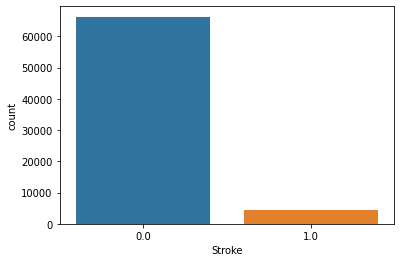

In [ ]:
#Result: the target variable "Stroke" is not balanced
sns.countplot(data = data, x = "Stroke")
print(data['Stroke'].value_counts())

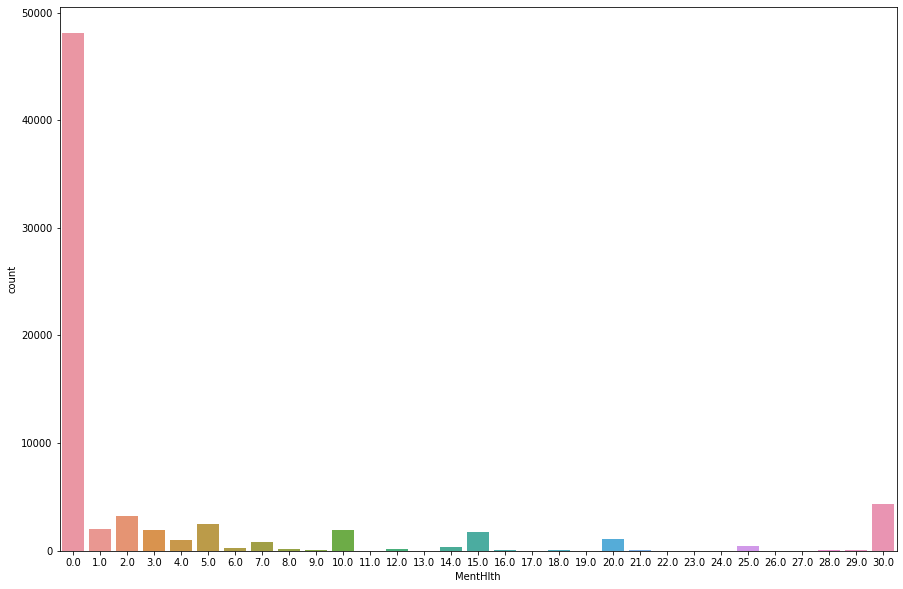

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.countplot(data = data, x = "MentHlth")
fig.show()

In [ ]:
print(data['PhysHlth'].value_counts())

0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: PhysHlth, dtype: int64


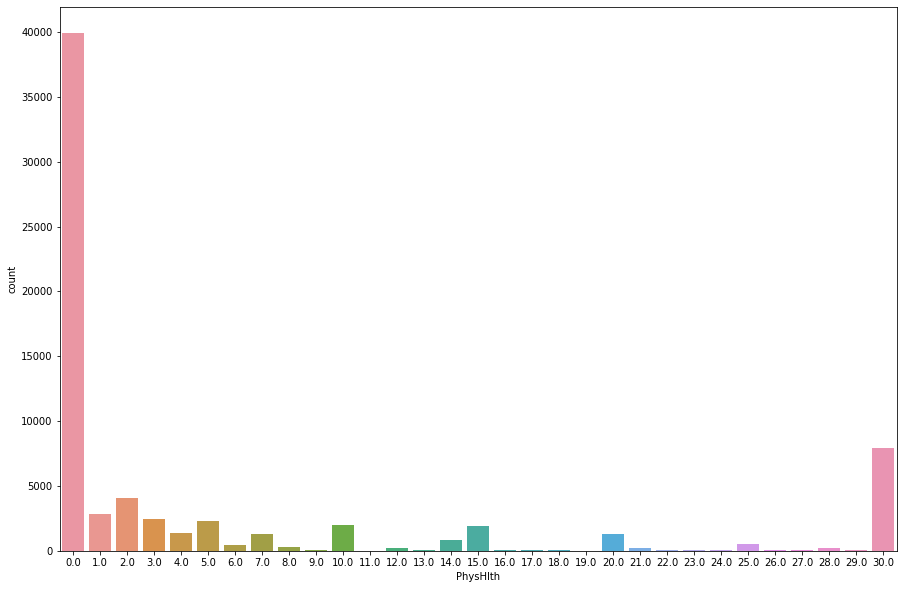

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.countplot(data = data, x = "PhysHlth")
fig.show()

##Pair Plot

<Figure size 1440x1440 with 0 Axes>

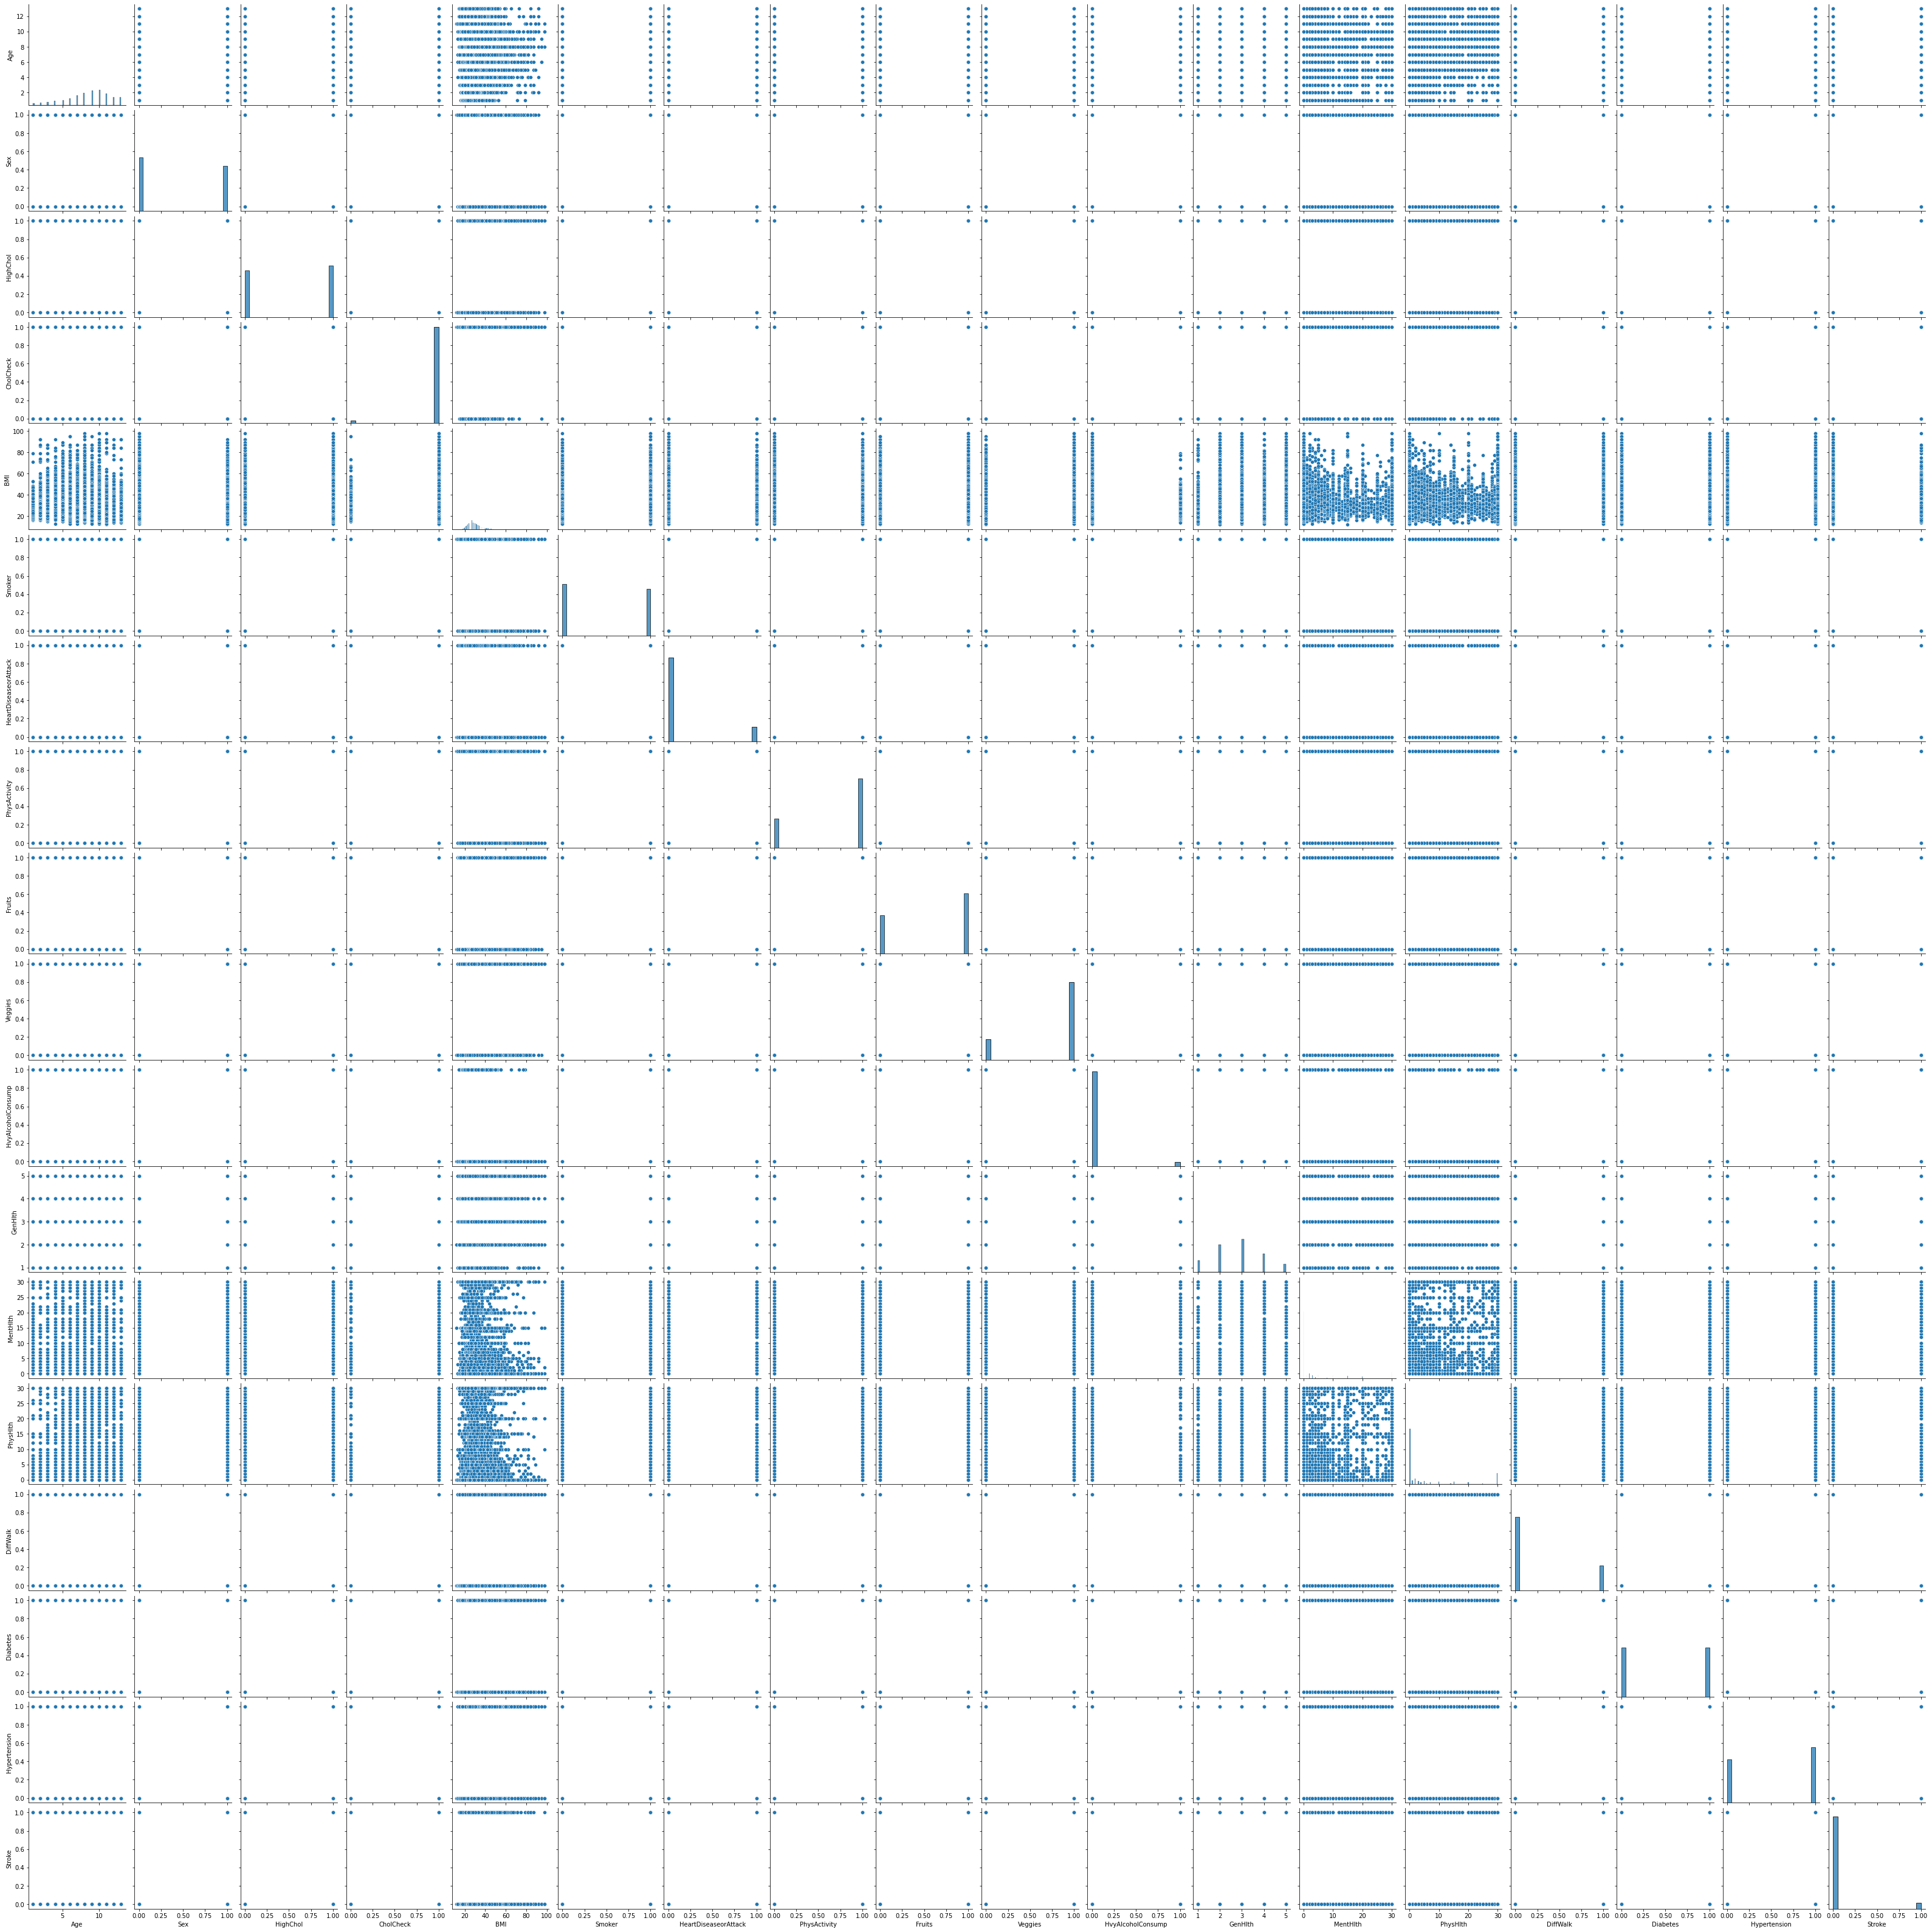

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

##Scatter Plot

<Figure size 576x576 with 0 Axes>

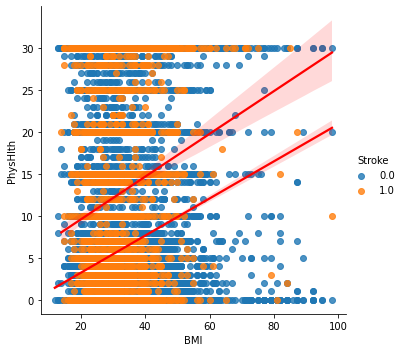

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.lmplot(data = data, x = 'BMI', y = 'PhysHlth', hue = 'Stroke', line_kws={"color": "red"})
plt.show()

##Distribution Plot

<Figure size 720x720 with 0 Axes>

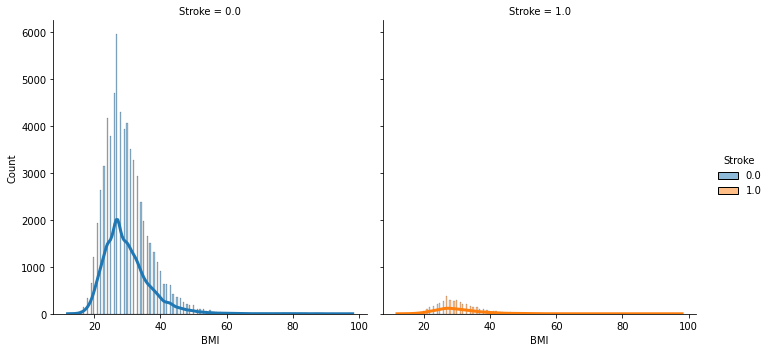

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.displot(data = data, x = "BMI", hue = 'Stroke', col = 'Stroke', kde = True,line_kws={'lw': 3})
fig.show()

#Data Pre-processing

Categorical data encoding is not needed as all the attributes are numeric and class balancing is not needed as well since the target variable "Cardio" is balanced.

In [ ]:
x_input = data.drop(['Stroke'], axis = 1)
y_output = data['Stroke']

###Handling Imbalanced Data

In [ ]:
#target class before class balancing
y_output.value_counts()

0.0    66297
1.0     4395
Name: Stroke, dtype: int64

In [ ]:
#Class Balancing using SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_input, y_output)

In [ ]:
print('Shape of X: ', x_smote.shape)
print('Shape of Y: ', y_smote.shape)

Shape of X:  (132594, 17)
Shape of Y:  (132594,)


In [ ]:
#Target class after class balancing
y_smote.value_counts()

0.0    66297
1.0    66297
Name: Stroke, dtype: int64

###Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size= 0.2, random_state= 42)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', y_test.shape)

Shape of X_train:  (106075, 17)
Shape of y_train:  (106075,)
Shape of X_test:  (26519, 17)
Shape of Y_test:  (26519,)


###Feature Scaling

In [ ]:
#MinMaxScalar
MMscalar = MinMaxScaler()
X_train_MinMax = MMscalar.fit_transform(X_train)
X_test_MinMax = MMscalar.fit_transform(X_test)

In [ ]:
#StandardScalar -> assume that the distribution is normally distributed
scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
X_test_standard = scalar.fit_transform(X_test)

#Model Training

####Artificial Neural Network (ANN)

#####ANN without feature scaling

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs = 50)

Epoch 1/50
10608/10608 [==============================] - 20s 2ms/step - loss: 0.5404 - accuracy: 0.7311
Epoch 2/50
10608/10608 [==============================] - 23s 2ms/step - loss: 0.4990 - accuracy: 0.7505
Epoch 3/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.4764 - accuracy: 0.7595
Epoch 4/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.4600 - accuracy: 0.7707
Epoch 5/50
10608/10608 [==============================] - 20s 2ms/step - loss: 0.4476 - accuracy: 0.7780
Epoch 6/50
10608/10608 [==============================] - 20s 2ms/step - loss: 0.4379 - accuracy: 0.7842
Epoch 7/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.4313 - accuracy: 0.7868
Epoch 8/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.4242 - accuracy: 0.7908
Epoch 9/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.4081 - accuracy: 0.8027
Epoch 10/50
10608/10608 [==============================

In [ ]:
y_pred_wFS = model.predict(X_test)
y_pred_wFS = (y_pred_wFS > 0.5)

829/829 [==============================] - 1s 1ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_wFS))
print('R square:', r2_score(y_test, y_pred_wFS))
print('Accuracy:', accuracy_score(y_test, y_pred_wFS))

report = classification_report(y_test, y_pred_wFS, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_wFS)
print(cm)

Mean Squared Error: 0.10615030732682228
R square: 0.5753588889619274
Accuracy: 0.8938496926731777
              precision    recall  f1-score   support

         0.0     0.8744    0.9222    0.8977     13388
         1.0     0.9160    0.8650    0.8897     13131

    accuracy                         0.8938     26519
   macro avg     0.8952    0.8936    0.8937     26519
weighted avg     0.8950    0.8938    0.8937     26519

[[12346  1042]
 [ 1773 11358]]


829/829 [==============================] - 7s 8ms/step


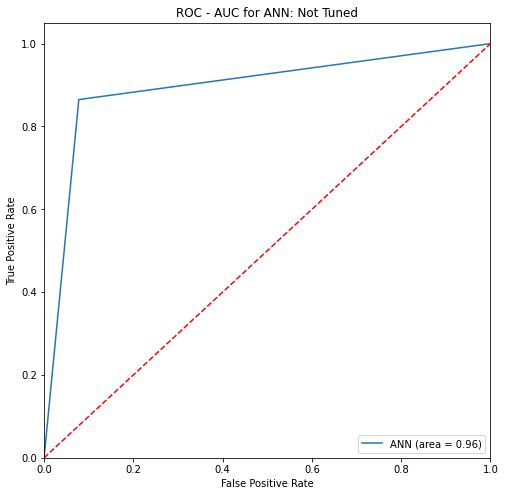

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_wFS, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Not Tuned')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

######Grid Search Cross Validation - ANN w/o Feature Scaling

In [ ]:
def ANN_nofeature(optimizer = 'adam'):
  model = Sequential()
  model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
ANN_noFS = KerasClassifier(build_fn = ANN_nofeature)

<ipython-input-41-9b2ee5310e9e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_noFS = KerasClassifier(build_fn = ANN_nofeature)


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [10, 32],
             'epochs': [50, 100],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ANN_noFS, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
3315/3315 [==============================] - 5s 1ms/step - loss: 0.5505 - accuracy: 0.7287
Epoch 2/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.5186 - accuracy: 0.7437
Epoch 3/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4974 - accuracy: 0.7552
Epoch 4/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4751 - accuracy: 0.7644
Epoch 5/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4593 - accuracy: 0.7736
Epoch 6/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4471 - accuracy: 0.7804
Epoch 7/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4368 - accuracy: 0.7882
Epoch 8/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4227 - accuracy: 0.7977
Epoch 9/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4044 - accuracy: 0.8090
Epoch 10/100
3315/3315 [==============================] - 4s 1ms/step - l

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8119e45f70>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 32], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.9107141173697857

In [ ]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}

Apply the best paramter based on Grid Search CV to the ANN

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
3315/3315 [==============================] - 8s 2ms/step - loss: 0.5569 - accuracy: 0.7196
Epoch 2/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.5217 - accuracy: 0.7419
Epoch 3/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4964 - accuracy: 0.7581
Epoch 4/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4716 - accuracy: 0.7728
Epoch 5/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.4452 - accuracy: 0.7881
Epoch 6/100
3315/3315 [==============================] - 5s 1ms/step - loss: 0.4152 - accuracy: 0.8057
Epoch 7/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.3879 - accuracy: 0.8220
Epoch 8/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.3654 - accuracy: 0.8323
Epoch 9/100
3315/3315 [==============================] - 4s 1ms/step - loss: 0.3491 - accuracy: 0.8421
Epoch 10/100
3315/3315 [==============================] - 4s 1ms/step - l

In [ ]:
y_pred_wFS_grid = model.predict(X_test)
y_pred_wFS_grid = (y_pred_wFS_grid > 0.5)

829/829 [==============================] - 1s 819us/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_wFS_grid))
print('R square:', r2_score(y_test, y_pred_wFS_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_wFS_grid))

report = classification_report(y_test, y_pred_wFS_grid, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_wFS_grid)
print(cm)

Mean Squared Error: 0.08725819223952638
R square: 0.6509344472674601
Accuracy: 0.9127418077604736
              precision    recall  f1-score   support

         0.0     0.8889    0.9452    0.9162     13388
         1.0     0.9403    0.8796    0.9089     13131

    accuracy                         0.9127     26519
   macro avg     0.9146    0.9124    0.9126     26519
weighted avg     0.9144    0.9127    0.9126     26519

[[12655   733]
 [ 1581 11550]]


829/829 [==============================] - 1s 1ms/step


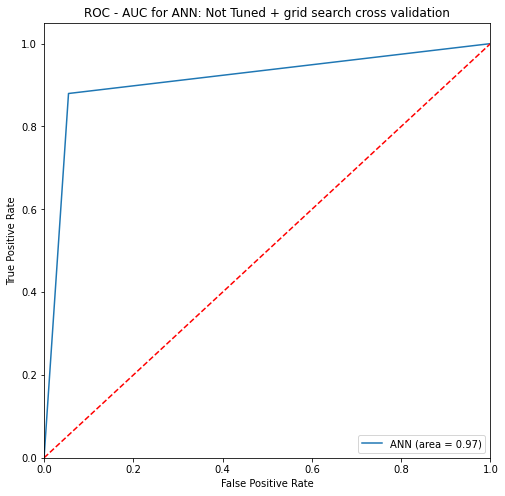

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_wFS_grid, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Not Tuned + grid search cross validation')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

#####ANN with Standard Scalar

In [ ]:
model_SS = Sequential()
model_SS.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
model_SS.add(Dense(16, activation = 'relu'))
model_SS.add(Dense(1, activation = 'sigmoid'))
model_SS.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_SS.fit(X_train_standard, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
10608/10608 [==============================] - 64s 6ms/step - loss: 0.4227 - accuracy: 0.8025
Epoch 2/50
10608/10608 [==============================] - 76s 7ms/step - loss: 0.3005 - accuracy: 0.8660
Epoch 3/50
10608/10608 [==============================] - 56s 5ms/step - loss: 0.2725 - accuracy: 0.8785
Epoch 4/50
10608/10608 [==============================] - 64s 6ms/step - loss: 0.2606 - accuracy: 0.8857
Epoch 5/50
10608/10608 [==============================] - 62s 6ms/step - loss: 0.2506 - accuracy: 0.8905
Epoch 6/50
10608/10608 [==============================] - 50s 5ms/step - loss: 0.2449 - accuracy: 0.8934
Epoch 7/50
10608/10608 [==============================] - 53s 5ms/step - loss: 0.2403 - accuracy: 0.8962
Epoch 8/50
10608/10608 [==============================] - 60s 6ms/step - loss: 0.2359 - accuracy: 0.8985
Epoch 9/50
10608/10608 [==============================] - 65s 6ms/step - loss: 0.2313 - accuracy: 0.9005
Epoch 10/50
10608/10608 [==============================

In [ ]:
y_pred_SS = model_SS.predict(X_test_standard)
y_pred_SS = (y_pred_SS > 0.5)

829/829 [==============================] - 1s 2ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SS))
print('R square:', r2_score(y_test, y_pred_SS))
print('Accuracy:', accuracy_score(y_test, y_pred_SS))

report = classification_report(y_test, y_pred_SS, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_SS)
print(cm)

Mean Squared Error: 0.07918850635393491
R square: 0.68321622267142
Accuracy: 0.9208114936460651
              precision    recall  f1-score   support

         0.0     0.8916    0.9599    0.9245     13388
         1.0     0.9556    0.8810    0.9168     13131

    accuracy                         0.9208     26519
   macro avg     0.9236    0.9204    0.9206     26519
weighted avg     0.9233    0.9208    0.9207     26519

[[12851   537]
 [ 1563 11568]]


829/829 [==============================] - 3s 4ms/step


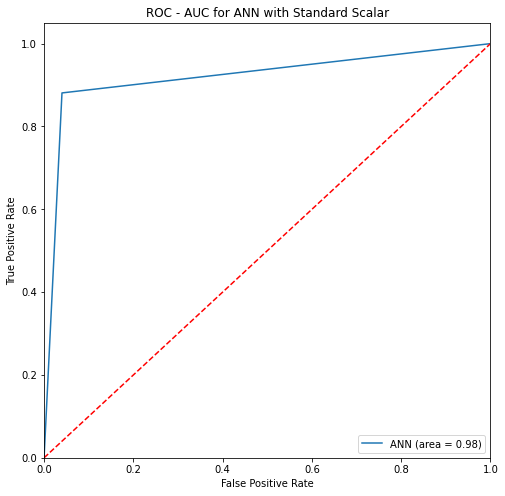

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_SS.predict(X_test_standard))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SS, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with Standard Scalar')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

######Grid Search Cross Validation - ANN w/ Standard Scalar

In [ ]:
def ANN_SS(optimizer = 'adam'):
  model_SS = Sequential()
  model_SS.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
  model_SS.add(Dense(16, activation = 'relu'))
  model_SS.add(Dense(1, activation = 'sigmoid'))
  model_SS.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return model_SS

In [ ]:
ANN_SScale = KerasClassifier(build_fn = ANN_SS)

<ipython-input-17-0009c25fd1d8>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_SScale = KerasClassifier(build_fn = ANN_SS)


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [32, 64],
             'epochs': [50, 100],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ANN_SScale, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train_standard, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.4893 - accuracy: 0.7627
Epoch 2/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8342
Epoch 3/100
1658/1658 [==============================] - 4s 3ms/step - loss: 0.3028 - accuracy: 0.8684
Epoch 4/100
1658/1658 [==============================] - 5s 3ms/step - loss: 0.2741 - accuracy: 0.8816
Epoch 5/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.8891
Epoch 6/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.8939
Epoch 7/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2399 - accuracy: 0.8986
Epoch 8/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2343 - accuracy: 0.9008
Epoch 9/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2299 - accuracy: 0.9027
Epoch 10/100
1658/1658 [==============================] - 4s 2ms/step - l

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f66a67c6fd0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.9180768324298846

In [ ]:
grid_search.best_params_

{'batch_size': 64, 'epochs': 100, 'optimizer': 'rmsprop'}

Apply best parameter based on Grid Search CV to ANN with Standard Scalar

In [ ]:
model_SS_grid = Sequential()
model_SS_grid.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
model_SS_grid.add(Dense(16, activation = 'relu'))
model_SS_grid.add(Dense(1, activation = 'sigmoid'))
model_SS_grid.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_SS_grid.fit(X_train_standard, y_train, batch_size=64, epochs = 100)

Epoch 1/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.5000 - accuracy: 0.7552
Epoch 2/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.4029 - accuracy: 0.8167
Epoch 3/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.8544
Epoch 4/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8709
Epoch 5/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.8812
Epoch 6/100
1658/1658 [==============================] - 2s 1ms/step - loss: 0.2596 - accuracy: 0.8874
Epoch 7/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2507 - accuracy: 0.8906
Epoch 8/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2444 - accuracy: 0.8949
Epoch 9/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2389 - accuracy: 0.8966
Epoch 10/100
1658/1658 [==============================] - 2s 2ms/step - l

In [ ]:
y_pred_SS_grid = model_SS_grid.predict(X_test_standard)
y_pred_SS_grid = (y_pred_SS_grid > 0.5)

829/829 [==============================] - 1s 1ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SS_grid))
print('R square:', r2_score(y_test, y_pred_SS_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_SS_grid))

report = classification_report(y_test, y_pred_SS_grid, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_SS_grid)
print(cm)

Mean Squared Error: 0.08955842980504544
R square: 0.6417326327831536
Accuracy: 0.9104415701949545
              precision    recall  f1-score   support

         0.0     0.9176    0.9037    0.9106     13388
         1.0     0.9033    0.9173    0.9103     13131

    accuracy                         0.9104     26519
   macro avg     0.9105    0.9105    0.9104     26519
weighted avg     0.9106    0.9104    0.9104     26519

[[12099  1289]
 [ 1086 12045]]


829/829 [==============================] - 1s 1ms/step


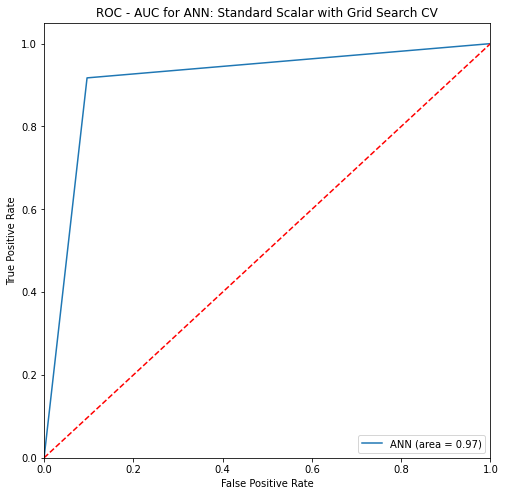

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_SS_grid.predict(X_test_standard))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SS_grid, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Standard Scalar with Grid Search CV')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

#####ANN with MinMaxScalar

In [ ]:
model_MM = Sequential()
model_MM.add(Dense(64, input_dim = X_train_MinMax.shape[1], activation = "relu"))
model_MM.add(Dense(16, activation = 'relu'))
model_MM.add(Dense(1, activation = 'sigmoid'))
model_MM.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_MM.fit(X_train_MinMax, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
10608/10608 [==============================] - 20s 2ms/step - loss: 0.4244 - accuracy: 0.7993
Epoch 2/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.2891 - accuracy: 0.8705
Epoch 3/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.2485 - accuracy: 0.8913
Epoch 4/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.2276 - accuracy: 0.9012
Epoch 5/50
10608/10608 [==============================] - 18s 2ms/step - loss: 0.2170 - accuracy: 0.9066
Epoch 6/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.2078 - accuracy: 0.9122
Epoch 7/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.2025 - accuracy: 0.9143
Epoch 8/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.1987 - accuracy: 0.9164
Epoch 9/50
10608/10608 [==============================] - 19s 2ms/step - loss: 0.1955 - accuracy: 0.9177
Epoch 10/50
10608/10608 [==============================

In [ ]:
y_pred_MM = model_MM.predict(X_test_MinMax)
y_pred_MM = (y_pred_MM > 0.5)

829/829 [==============================] - 1s 1ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_MM))
print('R square:', r2_score(y_test, y_pred_MM))
print('Accuracy:', accuracy_score(y_test, y_pred_MM))

report = classification_report(y_test, y_pred_MM, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_MM)
print(cm)

Mean Squared Error: 0.06172932614351974
R square: 0.7530595031014832
Accuracy: 0.9382706738564802
              precision    recall  f1-score   support

         0.0     0.9122    0.9712    0.9408     13388
         1.0     0.9686    0.9047    0.9355     13131

    accuracy                         0.9383     26519
   macro avg     0.9404    0.9379    0.9382     26519
weighted avg     0.9401    0.9383    0.9382     26519

[[13003   385]
 [ 1252 11879]]


829/829 [==============================] - 1s 1ms/step


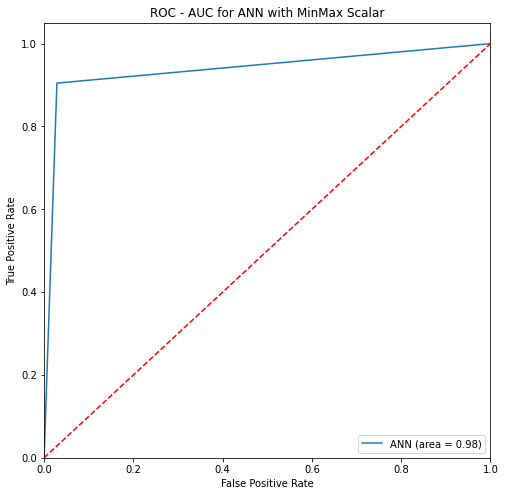

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_MM.predict(X_test_MinMax))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_MM, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with MinMax Scalar')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

######Grid Search Cross Validation - ANN w/ MinMax Scalar

In [ ]:
def ANN_MinMax(optimizer = 'adam'):
  model_MM = Sequential()
  model_MM.add(Dense(64, input_dim = X_train_MinMax.shape[1], activation = "relu"))
  model_MM.add(Dense(16, activation = 'relu'))
  model_MM.add(Dense(1, activation = 'sigmoid'))
  model_MM.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  return model_MM

In [ ]:
ANN_MinMax = KerasClassifier(build_fn = ANN_MinMax)

<ipython-input-29-2a718895aea4>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_MinMax = KerasClassifier(build_fn = ANN_MinMax)


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [32, 64],
             'epochs': [50, 100],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ANN_MinMax, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train_MinMax, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.7742
Epoch 2/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.3757 - accuracy: 0.8292
Epoch 3/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.3096 - accuracy: 0.8639
Epoch 4/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.8788
Epoch 5/100
1658/1658 [==============================] - 4s 3ms/step - loss: 0.2544 - accuracy: 0.8905
Epoch 6/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.8969
Epoch 7/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2304 - accuracy: 0.9030
Epoch 8/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2210 - accuracy: 0.9087
Epoch 9/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2140 - accuracy: 0.9110
Epoch 10/100
1658/1658 [==============================] - 3s 2ms/step - l

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f669f28bf70>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.9364883337261372

In [ ]:
grid_search.best_params_

{'batch_size': 64, 'epochs': 100, 'optimizer': 'rmsprop'}

Apply best paramter based on Grid Search CV to ANN with MinMax Scalar

In [ ]:
model_MM_grid = Sequential()
model_MM_grid.add(Dense(64, input_dim = X_train_MinMax.shape[1], activation = "relu"))
model_MM_grid.add(Dense(16, activation = 'relu'))
model_MM_grid.add(Dense(1, activation = 'sigmoid'))
model_MM_grid.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_MM_grid.fit(X_train_MinMax, y_train, batch_size=64, epochs = 100)

Epoch 1/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.4782 - accuracy: 0.7708
Epoch 2/100
1658/1658 [==============================] - 5s 3ms/step - loss: 0.3910 - accuracy: 0.8206
Epoch 3/100
1658/1658 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8518
Epoch 4/100
1658/1658 [==============================] - 4s 3ms/step - loss: 0.3010 - accuracy: 0.8672
Epoch 5/100
1658/1658 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.8777
Epoch 6/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2624 - accuracy: 0.8874
Epoch 7/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.8934
Epoch 8/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2406 - accuracy: 0.8974
Epoch 9/100
1658/1658 [==============================] - 3s 2ms/step - loss: 0.2341 - accuracy: 0.9011
Epoch 10/100
1658/1658 [==============================] - 3s 2ms/step - l

In [ ]:
y_pred_MM_grid = model_MM_grid.predict(X_test_MinMax)
y_pred_MM_grid = (y_pred_MM_grid > 0.5)

829/829 [==============================] - 1s 1ms/step


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_MM_grid))
print('R square:', r2_score(y_test, y_pred_MM_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_MM_grid))

report = classification_report(y_test, y_pred_MM_grid, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_MM_grid)
print(cm)

Mean Squared Error: 0.0682906595271315
R square: 0.7268117044085437
Accuracy: 0.9317093404728685
              precision    recall  f1-score   support

         0.0     0.8932    0.9821    0.9356     13388
         1.0     0.9797    0.8803    0.9274     13131

    accuracy                         0.9317     26519
   macro avg     0.9365    0.9312    0.9315     26519
weighted avg     0.9361    0.9317    0.9315     26519

[[13149   239]
 [ 1572 11559]]


829/829 [==============================] - 2s 3ms/step


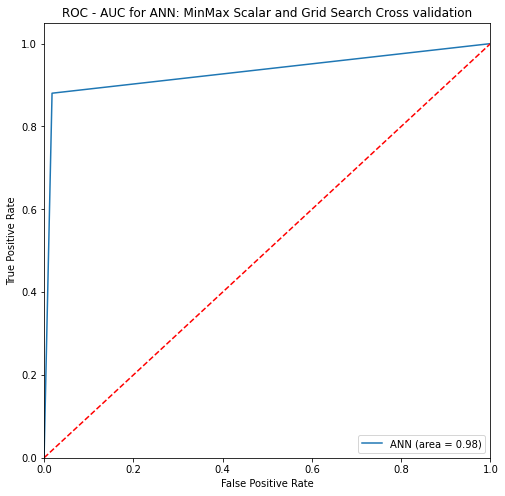

In [ ]:
ANN_roc_auc = roc_auc_score(y_test, model_MM_grid.predict(X_test_MinMax))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_MM_grid, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: MinMax Scalar and Grid Search Cross validation')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

####Random Forest

#####Random Forest without Feature Scaling

In [ ]:
rf_wFS = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_wFS.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_wFS_pred = rf_wFS.predict(X_test)

In [ ]:
report = classification_report(y_test, rf_wFS_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9440    0.9873    0.9652     13388
         1.0     0.9864    0.9403    0.9628     13131

    accuracy                         0.9640     26519
   macro avg     0.9652    0.9638    0.9640     26519
weighted avg     0.9650    0.9640    0.9640     26519



Text(0.5, 0, 'False Positive Rate')

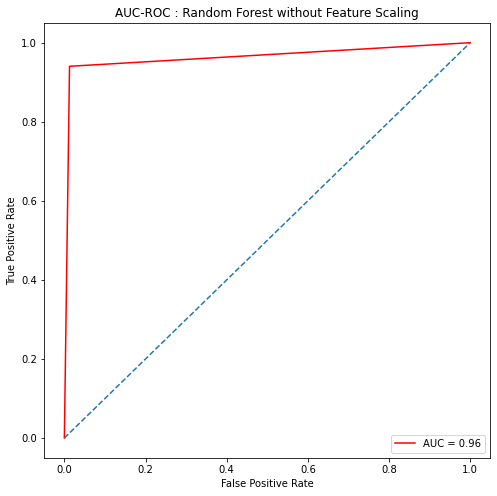

In [ ]:
rf_auc = roc_auc_score(y_test, rf_wFS_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_wFS_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest without Feature Scaling')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

######Random Forest w/o Feature Scaling with Randomized Search Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 40, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf
               }

In [ ]:
rf_wFS_random = RandomizedSearchCV(estimator = rf_wFS, param_distributions= random_grid, cv = 5, n_jobs = -1)
rf_wFS_random.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:687: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  p.join()


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]})

In [ ]:
rf_wFS_random.best_score_

0.9651944378977138

In [ ]:
rf_wFS_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 26}

Apply best parameter and apply it to the Random Forest without Feature Scaling

In [ ]:
rf_wFS_random_best = RandomForestClassifier(max_depth=26, min_samples_leaf=2,
                                 min_samples_split=5, n_estimators=733)
rf_wFS_random_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=733)

In [ ]:
rf_wFS_random_pred = rf_wFS_random_best.predict(X_test)

In [ ]:
report = classification_report(y_test, rf_wFS_random_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9434    0.9951    0.9686     13388
         1.0     0.9947    0.9392    0.9661     13131

    accuracy                         0.9674     26519
   macro avg     0.9690    0.9671    0.9673     26519
weighted avg     0.9688    0.9674    0.9673     26519



Text(0.5, 0, 'False Positive Rate')

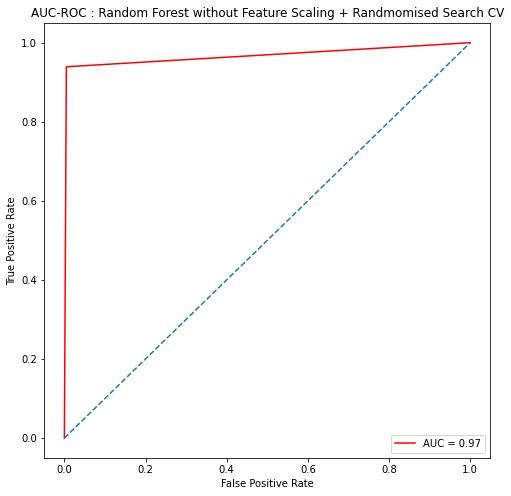

In [ ]:
rf_auc = roc_auc_score(y_test, rf_wFS_random_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_wFS_random_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest without Feature Scaling + Randmomised Search CV')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#####Random Forest with MinMax Scalar

In [ ]:
rf_MM = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_MM.fit(X_train_MinMax, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_MM_pred = rf_MM.predict(X_test_MinMax)

In [ ]:
rf_MM_eval = classification_report(y_test, rf_MM_pred, digits = 4)
print(rf_MM_eval)

              precision    recall  f1-score   support

         0.0     0.9421    0.9857    0.9634     13388
         1.0     0.9847    0.9382    0.9609     13131

    accuracy                         0.9622     26519
   macro avg     0.9634    0.9619    0.9621     26519
weighted avg     0.9632    0.9622    0.9621     26519



Text(0.5, 0, 'False Positive Rate')

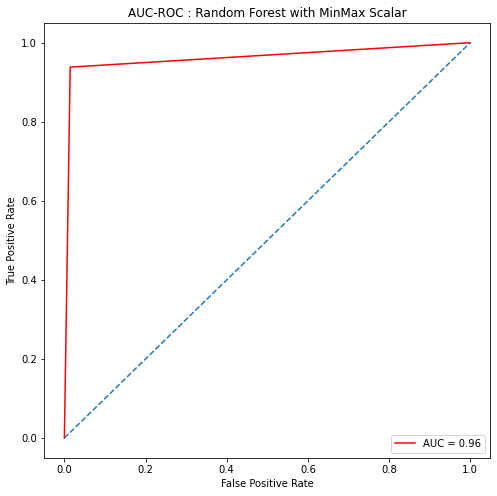

In [ ]:
rf_auc = roc_auc_score(y_test, rf_MM_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_MM_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with MinMax Scalar')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

######Random Forest with MinMax Scalling with Randomized Search Cross Validation

In [ ]:
rf_MinMax_rand = RandomizedSearchCV(estimator = rf_MM, param_distributions= random_grid, cv = 5, n_jobs = -1)
rf_MinMax_rand.fit(X_train_MinMax, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]})

In [ ]:
rf_MinMax_rand.best_score_

0.9652415743577658

In [ ]:
rf_MinMax_rand.best_params_

{'n_estimators': 288,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 40}

In [ ]:
rf_MinMax_rand_best = RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=288)
rf_MinMax_rand_best.fit(X_train_MinMax, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, n_estimators=288)

In [ ]:
rf_MinMax_rand_pred = rf_MinMax_rand_best.predict(X_test_MinMax)

In [ ]:
report = classification_report(y_test, rf_MinMax_rand_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9425    0.9942    0.9677     13388
         1.0     0.9938    0.9382    0.9652     13131

    accuracy                         0.9665     26519
   macro avg     0.9681    0.9662    0.9664     26519
weighted avg     0.9679    0.9665    0.9664     26519



Text(0.5, 0, 'False Positive Rate')

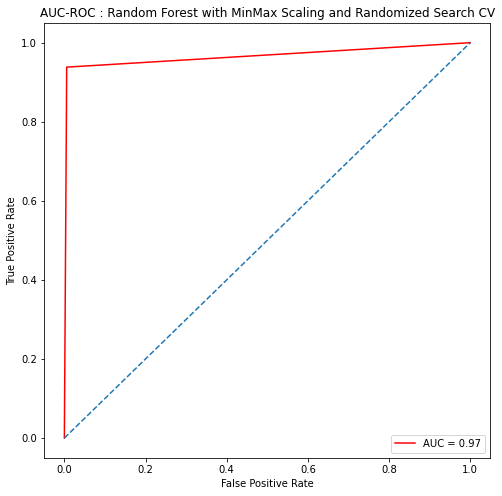

In [ ]:
rf_auc = roc_auc_score(y_test, rf_MinMax_rand_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_MinMax_rand_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with MinMax Scaling and Randomized Search CV')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#####Random Forest with Standard Scalar

In [ ]:
rf_SS = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_SS.fit(X_train_standard, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_SS_pred = rf_SS.predict(X_test_standard)

In [ ]:
rf_SS_eval = classification_report(y_test, rf_SS_pred, digits = 4)
print(rf_SS_eval)

              precision    recall  f1-score   support

         0.0     0.7609    0.0026    0.0052     13388
         1.0     0.4956    0.9992    0.6626     13131

    accuracy                         0.4961     26519
   macro avg     0.6282    0.5009    0.3339     26519
weighted avg     0.6295    0.4961    0.3307     26519



Text(0.5, 0, 'False Positive Rate')

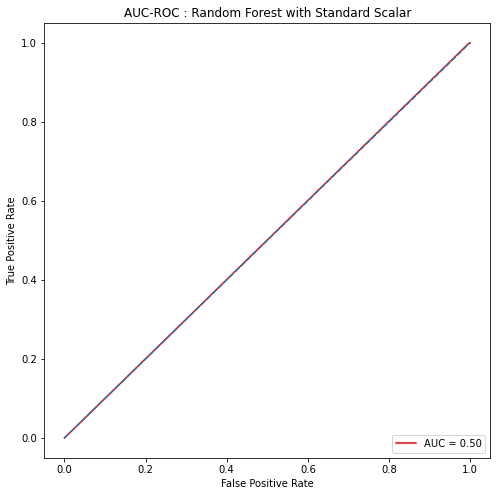

In [ ]:
rf_auc = roc_auc_score(y_test, rf_SS_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_SS_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with Standard Scalar')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

######Random Forest with Standard Scalar with Randomized Search Cross Validation

In [ ]:
rf_SScalar_rand = RandomizedSearchCV(estimator = rf_SS, param_distributions= random_grid, cv = 5, n_jobs = -1)
rf_SScalar_rand.fit(X_train_standard, y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 13, 16, 20, 23, 26,
                                                      30, 33, 36, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]})

In [ ]:
rf_SScalar_rand.best_score_

0.9642234268206457

In [ ]:
rf_SScalar_rand.best_params_

{'n_estimators': 377,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [ ]:
rf_SScalar_rand_best = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=377)
rf_SScalar_rand_best.fit(X_train_standard, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=377)

In [ ]:
rf_SScalar_rand_pred = rf_SScalar_rand_best.predict(X_test_standard)

In [ ]:
report = classification_report(y_test, rf_SScalar_rand_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

         0.0     0.7500    0.0004    0.0009     13388
         1.0     0.4952    0.9998    0.6624     13131

    accuracy                         0.4953     26519
   macro avg     0.6226    0.5001    0.3316     26519
weighted avg     0.6238    0.4953    0.3284     26519



Text(0.5, 0, 'False Positive Rate')

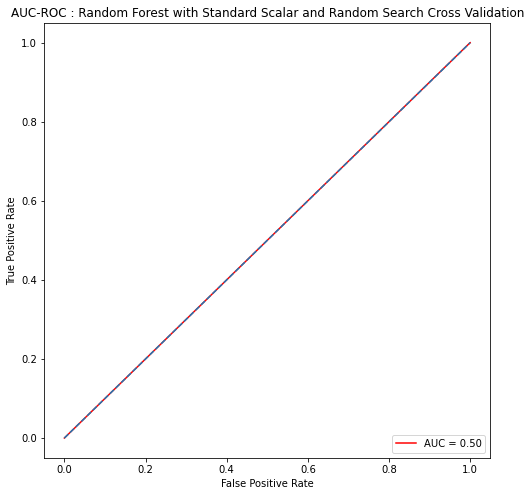

In [ ]:
rf_auc = roc_auc_score(y_test, rf_SScalar_rand_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_SScalar_rand_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest with Standard Scalar and Random Search Cross Validation')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Genetic Algorithm with Neural Network (GANN)

GA setup

In [ ]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 5.1 MB/s 


In [ ]:
import pygad
import pygad.nn
import pygad.gann

In [ ]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs, problem_type="classification")
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}%".format(fitness=ga_instance.best_solution()[1]))

#####GANN without Feature Scaling

In [ ]:
data_inputs = np.array(X_train)
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=2,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:764: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 58.41150129625265%
Generation = 2
Accuracy   = 58.39641762903606%
Generation = 3
Accuracy   = 58.6292717416922%
Generation = 4
Accuracy   = 62.24275276926703%
Generation = 5
Accuracy   = 62.24275276926703%
Generation = 6
Accuracy   = 63.945321706339854%
Generation = 7
Accuracy   = 63.945321706339854%
Generation = 8
Accuracy   = 63.945321706339854%
Generation = 9
Accuracy   = 64.82865896771153%
Generation = 10
Accuracy   = 64.82865896771153%
Generation = 11
Accuracy   = 64.82865896771153%
Generation = 12
Accuracy   = 64.82865896771153%
Generation = 13
Accuracy   = 64.82865896771153%
Generation = 14
Accuracy   = 64.82865896771153%
Generation = 15
Accuracy   = 64.82865896771153%
Generation = 16
Accuracy   = 65.96276219655904%
Generation = 17
Accuracy   = 66.11171341032288%
Generation = 18
Accuracy   = 66.11171341032288%
Generation = 19
Accuracy   = 66.11171341032288%
Generation = 20
Accuracy   = 66.11171341032288%
Generation = 21
Accuracy   = 66.11171341032288%

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


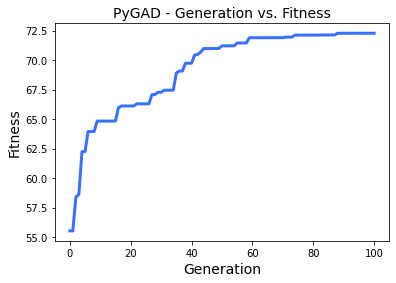

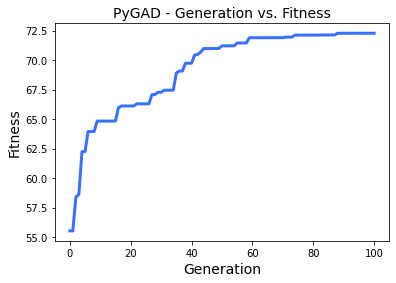

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[ 7.55161960e-01 -3.13910665e-03  1.16092801e-01  9.00254829e-04
  2.79957533e+00  9.97117683e-03  9.63570169e-02 -1.01386945e+00
 -1.74489009e-02  8.90194931e-03  3.72836610e-02  2.06734114e-01
 -1.04547437e+00 -3.49013767e-02  1.98324274e-01 -3.69022922e-01
  6.88387852e-02 -6.55490236e-01 -2.52034078e-01 -1.66964623e+00
  3.70780456e+00  4.72872353e-01  3.31586434e-01  9.39434918e-01
 -2.72290170e-02 -7.98589866e-02 -5.84281829e-01 -7.20199863e-02
  5.60705562e-01 -2.56604500e-01 -3.21602094e-02  6.78730858e-02
 -9.48296526e-02 -2.43310660e-02  6.26057740e-01  3.37766237e-02
  1.53273790e-01 -2.06837692e-02]
72.27433419750177
0


In [ ]:
print("Best Solution (Accuracy):", solution_fitness)

Best Solution (Accuracy): 72.27433419750177


#####GANN with MinMax Scalar

In [ ]:
data_inputs = X_train_MinMax
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=3,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 49.87885929766674%
Generation = 2
Accuracy   = 70.38039123261844%
Generation = 3
Accuracy   = 70.38039123261844%
Generation = 4
Accuracy   = 70.8432712703276%
Generation = 5
Accuracy   = 70.8432712703276%
Generation = 6
Accuracy   = 70.8432712703276%
Generation = 7
Accuracy   = 70.8432712703276%
Generation = 8
Accuracy   = 70.8432712703276%
Generation = 9
Accuracy   = 70.8432712703276%
Generation = 10
Accuracy   = 70.8432712703276%
Generation = 11
Accuracy   = 70.8432712703276%
Generation = 12
Accuracy   = 70.8432712703276%
Generation = 13
Accuracy   = 70.8432712703276%
Generation = 14
Accuracy   = 70.8432712703276%
Generation = 15
Accuracy   = 70.95734150365307%
Generation = 16
Accuracy   = 70.95734150365307%
Generation = 17
Accuracy   = 70.95734150365307%
Generation = 18
Accuracy   = 70.97431062927174%
Generation = 19
Accuracy   = 70.97431062927174%
Generation = 20
Accuracy   = 70.97431062927174%
Generation = 21
Accuracy   = 70.97431062927174%
Generation =

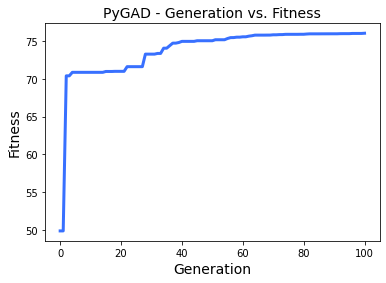

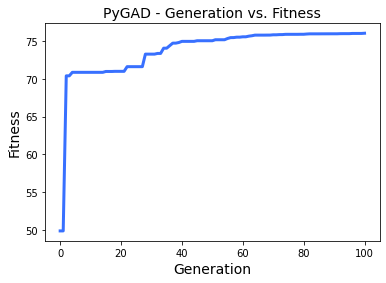

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[ 3.00737633e-02 -7.98864501e-02 -8.42054472e-02 -1.29904602e+00
  4.89650516e+00 -1.50467452e+00  2.08130513e-02 -3.20167342e-02
  3.60265911e-02 -3.26449685e-02  4.28455953e-03  1.27426005e+00
 -1.86073800e-01  1.83355052e+00 -5.07520876e-02 -5.33309105e-02
  2.68489075e-02  9.51631175e-02 -6.20543866e-02 -1.02559343e+00
  2.37302345e+00 -8.10464839e-01 -2.27825599e-02  4.69903005e-02
 -1.44906693e-01 -3.80358475e-01 -5.01692665e-02  1.33719768e-01
  1.57559373e-03  2.24540098e-01  3.72909742e-02  8.51824462e-01
  4.52677590e-02 -4.84455791e-02  1.17304267e+00 -5.57458941e-01
 -7.24516403e-02  7.24851201e-02]
76.0103700212114
3


In [ ]:
print("Best solution (Accuracy) for GA with MinMax Scalar:", solution_fitness)

Best solution (Accuracy) for GA with MinMax Scalar: 76.0103700212114


#####GANN with Standard Scalar

In [ ]:
data_inputs = X_train_standard
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=3,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 62.9629978788593%
Generation = 2
Accuracy   = 60.34221069997643%
Generation = 3
Accuracy   = 60.786236153664866%
Generation = 4
Accuracy   = 69.7657317935423%
Generation = 5
Accuracy   = 69.7657317935423%
Generation = 6
Accuracy   = 69.7657317935423%
Generation = 7
Accuracy   = 69.7657317935423%
Generation = 8
Accuracy   = 69.7657317935423%
Generation = 9
Accuracy   = 69.7657317935423%
Generation = 10
Accuracy   = 70.13245345274571%
Generation = 11
Accuracy   = 70.13245345274571%
Generation = 12
Accuracy   = 70.2955456045251%
Generation = 13
Accuracy   = 70.61041715767146%
Generation = 14
Accuracy   = 70.61041715767146%
Generation = 15
Accuracy   = 70.69997643176997%
Generation = 16
Accuracy   = 70.69997643176997%
Generation = 17
Accuracy   = 70.69997643176997%
Generation = 18
Accuracy   = 70.73957105821353%
Generation = 19
Accuracy   = 70.8432712703276%
Generation = 20
Accuracy   = 70.8432712703276%
Generation = 21
Accuracy   = 70.8432712703276%
Generation 

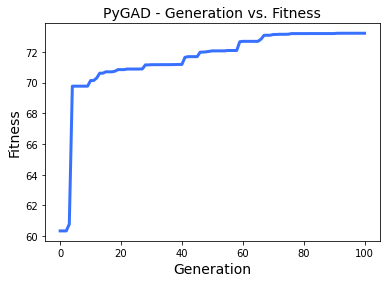

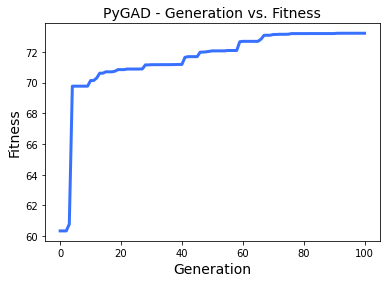

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[-0.40535994  0.3354409  -0.65237027  0.24715458  0.66823315  0.40345906
 -0.54307409  0.15245495 -0.36079047  0.06769496 -0.63157901  0.34411676
 -0.91960219 -0.08085835 -0.01710979 -0.06573863 -0.19175004 -0.02731246
 -0.09180528 -0.11270918  0.09067217  0.79021389 -0.27807368  0.00235589
  0.25837325 -0.07665211 -0.0529763   0.08746511 -0.93069246  0.17292073
  0.07784178 -0.01781117 -0.06999038  0.14805909 -0.07022884 -0.00714211
  1.02813839 -1.1382145 ]
73.21140702333255
0


In [ ]:
print("Best solution (Accuracy) for GA with Standard Scalar:", solution_fitness)

Best solution (Accuracy) for GA with Standard Scalar: 73.21140702333255


#Model Evaluation

In [1]:
Model_Name = ['RF w/o FS & CB', 'RF w/o FS', 'RF MinMax', 'RF standard scalar', 'RF w/o FS RSCV', 'RF MinMax RSCV', 'RF standard scalar RSCV','ANN w/o FS & CB', 'ANN w/o FS', 'ANN MinMax', 'ANN standard scalar', 'ANN w/o FS GSCV', 'ANN MinMax GSCV', 'ANN standard scalar GSCV','GANN w/o FS CB' , 'GANN w/o FS', 'GANN MinMax', 'GANN standard scalar']
Model_Accuracy = [92.6, 96.40, 96.22, 49.61, 96.74, 96.65, 49.53, 93.65, 89.38, 93.83, 92.08, 91.27, 93.17, 91.04, 93.82, 72.27, 76.01, 73.21]

In [4]:
eval = list(zip(Model_Name, Model_Accuracy))
eval = pd.DataFrame(eval, columns = ['Model_Name', 'Accuracy'])
eval

,Model_Name,Accuracy
0,RF w/o FS & CB,92.60
1,RF w/o FS,96.40
2,RF MinMax,96.22
3,RF standard scalar,49.61
4,RF w/o FS RSCV,96.74
5,RF MinMax RSCV,96.65
6,RF standard scalar RSCV,49.53
7,ANN w/o FS & CB,93.65
8,ANN w/o FS,89.38
9,ANN MinMax,93.83


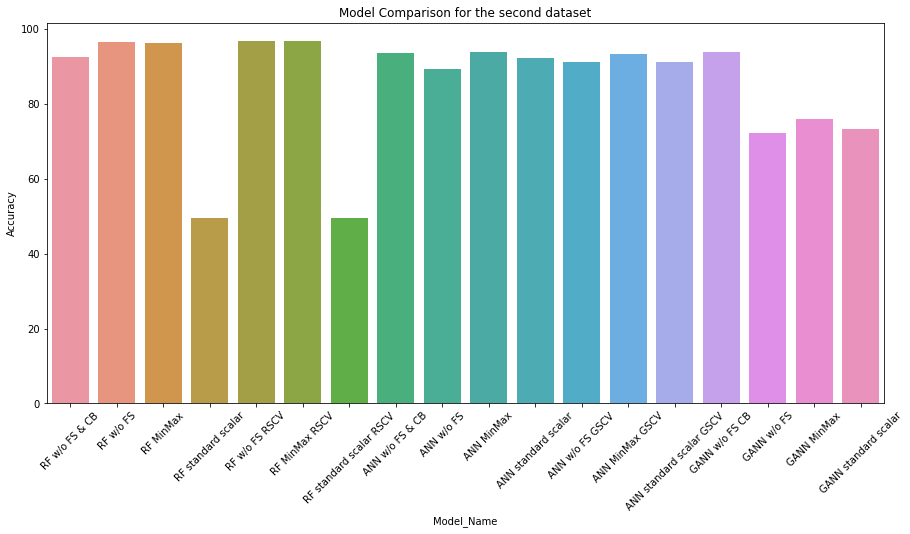

 Note:
 FS: Feature scaling
 CB: Class Balancing
 RSCV: Randomized Search Cross-validation
 GSCV: Grid Search Cross-validation
                  Model_Name  Accuracy
0             RF w/o FS & CB     92.60
1                  RF w/o FS     96.40
2                  RF MinMax     96.22
3         RF standard scalar     49.61
4             RF w/o FS RSCV     96.74
5             RF MinMax RSCV     96.65
6    RF standard scalar RSCV     49.53
7            ANN w/o FS & CB     93.65
8                 ANN w/o FS     89.38
9                 ANN MinMax     93.83
10       ANN standard scalar     92.08
11           ANN w/o FS GSCV     91.27
12           ANN MinMax GSCV     93.17
13  ANN standard scalar GSCV     91.04
14            GANN w/o FS CB     93.82
15               GANN w/o FS     72.27
16               GANN MinMax     76.01
17      GANN standard scalar     73.21


In [ ]:
fig = plt.figure(figsize = (15,7))
eval_barplot = sns.barplot(x = "Model_Name", y = "Accuracy", data = eval).set(title="Model Comparison for the second dataset")
plt.xticks(rotation=45)
plt.show()
print(" Note:\n FS: Feature scaling\n CB: Class Balancing\n RSCV: Randomized Search Cross-validation\n GSCV: Grid Search Cross-validation")
print(eval)

In [8]:
top5acc = eval.sort_values(by=['Accuracy'], ascending=False)
top5acc = top5acc.head(5)

In [9]:
top5acc

,Model_Name,Accuracy
4,RF w/o FS RSCV,96.74
5,RF MinMax RSCV,96.65
1,RF w/o FS,96.40
2,RF MinMax,96.22
9,ANN MinMax,93.83


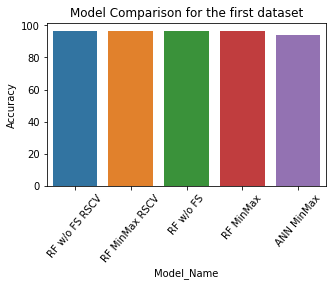

 Note:
 FS: Feature scaling
 CB: Class Balancing
 RSCV: Randomized Search Cross-validation
 GSCV: Grid Search Cross-validation
       Model_Name  Accuracy
4  RF w/o FS RSCV     96.74
5  RF MinMax RSCV     96.65
1       RF w/o FS     96.40
2       RF MinMax     96.22
9      ANN MinMax     93.83


In [11]:
fig = plt.figure(figsize = (5,3))
eval_barplot = sns.barplot(x = "Model_Name", y = "Accuracy", data = top5acc).set(title="Model Comparison for the first dataset")
plt.xticks(rotation = 50)
plt.show()
print(" Note:\n FS: Feature scaling\n CB: Class Balancing\n RSCV: Randomized Search Cross-validation\n GSCV: Grid Search Cross-validation")
print(top5acc)